CS5010 Final Project: Data Exploration of the COVID-19 Pandemic  
Project Group 1 (Spring 2020 Cohort): Akeem Wells (ajw3rg), Sam Tyree (jst6jz), Michael Davies (mld92)  
April 28, 2020

**Abstract:**  
This project aims to describe the variations in COVID-19 related transmission rates by comparing data and metrics from different countries. We analyzed time-based virus trends through visualizations of rates of transmission by country. We normalized by population and population density, as well as days since 100th case. Rate of death and rate of recovery were examined but we chose to focus for this project on transmission rates. We also “predict” future trends for the United States and China using a time series modeling tool. Importantly, we developed webscraping methods so users view near-real-time updates on countries of interest, and we developed custom functions to clean and plot the data. This is a topic that is rich for data exploration, and our custom functions will be helpful for future data scientists both in terms of accessing near real-time data and cleaning/visualizing the trends.

Our results are not optimistic, predicting continued growth in transmission rates. The data so far reflects the most affected countries are somewhat “developed-countries.” This may reflect a greater degree of international travel in and out of developed countries, or lack of reporting from under-developed countries, or some combination of both. Population density matters, but it is unclear how critical this is. More analysis must be done before we can make definitive conclusions. For instance, we did not have access to (possibly) important variables such as policy differences, levels of urbanization, weather/climate, levels of travel, or population age base. Including variables such as these would likely improve the analysis.

**Github Link:**

https://github.com/awells-uva/cs-project-covid

**Introduction:**

After first emerging in Wuhan, China in December, 2019, the novel coronavirus spread rapidly and took just a few months to become a global pandemic. By April 26, 2020, confirmed cases worldwide have reached 2.9 million and the number of deaths has exceeded 200,000 - a death rate of 7%. Rates of infection and death vary from country to country, sometimes significantly so. Europe has been hard hit, with several countries having far higher rates of death than other parts of the world. The United States has the highest overall number of confirmed cases.

This project aims to describe the variations in infection rates by comparing data and metrics from different countries. When we began, COVID-19 was still emerging and was largely considered a problem for China, though it was starting to spread to other countries. We were curious to know more about the disease and wanted to answer questions like these: How quickly do new cases appear? Does geography contribute to disease spread? Why do some countries have higher rates of death from the disease than others? How long would it take to see the number of new cases stop growing?


**The Data:**    
Data for the 2019 Novel Coronavirus COVID-19 (2019-nCoV) is obtained and regularly updated from the Data Repository by Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE). The JHU CSSE collects real-time publicly available data from multiple sources from across the globe. Although these sources do not always agree, the data is robust. JHU CSSE maintains and updates a GitHub repo and its contents for educational and academic research purposes. Not surprisingly, since we first began this project in late February, data on 2019-nCoV has expanded considerably and there are now many more data sources available. Even so, the JHU CSSE data set remains a go-to source for 2019-nCoV data.

For this project, each time the code is run, it scrapes the most current data available on the number of confirmed cases of infection, deaths, and recoveries from the JHU CSSE GitHub repo. We knew that COVID-19 is highly contagious and therefore the data on new cases would be constantly changing. By using web scraping techniques rather than manually loading updated .csv files every day, we created a more useful and lightweight tool. It also ensures that we are always using the latest data that is available.


**The flow of the paper/this product:**

  - Executing this file will download the latest data.
  - The first few rows are displayed to check the shape of the data.
  - The data are download in multiple data sets, and have descrepencies in country names. Therefore, these descrepencies are reconciled.
  - Then, a number of plots display the trends based on the most current data available.

In [1]:
import os
import shutil
if os.path.isdir(os.getcwd() + "/data"):
  shutil.rmtree(os.getcwd() + "/data")
if os.path.isdir(os.getcwd() + "/cs-project-covid"):
  shutil.rmtree(os.getcwd() + "/cs-project-covid")
!git clone https://github.com/awells-uva/cs-project-covid.git
import sys
sys.path.append("cs-project-covid")

Cloning into 'cs-project-covid'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 83 (delta 43), reused 59 (delta 22), pack-reused 0
Unpacking objects: 100% (83/83), done.


In [0]:
# User Imports
import covidPlotter
import webscraper
import dataImporter

# Third Party Imports
import os
import sys
import pandas
import numpy
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Data Structure

The covid datasets are time series csvfiles that comes from the Johns Hopkins University Center for Systems Science and Engineering (CSSE) for virus-specific data (province/state, country/region, latitude, longitude, infection count by day, death count by day, recovered count by day) stored in a comma-separated value format. The population data comes from Worldometers.info where different columns represent total population by country , population density by country and other various statistics.

In [3]:
url = "https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series"
ext = 'csv'

# Location where data will be stored locally
datapath = os.getcwd() + "/data/csse_covid_19_time_series"

# Webscrape
webscraper.webscrape(datapath,url,ext)
population = webscraper.webscrape_population_2020()

Fetching Data From: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series
Data is Stored in: /content/data/csse_covid_19_time_series/
Fetching Data From: https://www.worldometers.info/world-population/population-by-country/


In [0]:
covid_19_time_series_confirmed  = pandas.read_csv(datapath + '/time_series_covid19_confirmed_global.csv')
covid_19_time_series_deaths     = pandas.read_csv(datapath + '/time_series_covid19_deaths_global.csv')
covid_19_time_series_recovered  = pandas.read_csv(datapath + '/time_series_covid19_recovered_global.csv')

In [5]:
covid_19_time_series_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26


In [6]:
covid_19_time_series_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7,11,14,14,15,15,18,18,21,23,25,30,30,30,33,36,36,40,42,43,47,50
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15,16,17,20,20,21,22,22,23,23,23,23,23,24,25,26,26,26,26,26,26,27,27,27,27,28
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7,9,11,15,17,17,19,21,25,26,29,31,35,44,58,86,105,130,152,173,193,205,235,256,275,293,313,326,336,348,364,367,375,384,392,402,407,415,419,425
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,3,3,3,6,8,12,14,15,16,17,18,21,22,23,25,26,26,29,29,31,33,33,35,35,36,37,37,37,37,40,40,40
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [7]:
covid_19_time_series_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,2,2,2,2,2,2,5,5,10,10,10,15,18,18,29,32,32,32,32,32,40,43,54,99,112,131,135,150,166,179,188,188,207
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,2,2,10,17,17,31,31,33,44,52,67,76,89,99,104,116,131,154,165,182,197,217,232,248,251,277,283,302,314,327,345,356,385,394,403,410
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,12,32,32,32,65,65,24,65,29,29,31,31,37,46,61,61,62,90,90,90,113,237,347,405,460,591,601,691,708,783,846,894,1047,1099,1152,1204,1355,1408,1479,1508
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,10,10,10,10,16,21,26,31,39,52,58,71,71,128,128,128,169,169,191,205,235,248,282,309,333,344,344,344
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,2,2,2,2,2,2,4,4,4,5,5,5,5,6,6,6,6,6,6,6,6,6


In [8]:
population.head()

,country,population,yearlyChange,netChange,density(P/Km2),landArea(km2),migrants,fertRate,medAge,urbanPop,worldShare
0,China,1439323776,0.39 %,5540090,153,9388211,-348399,1.7,38,61 %,18.47 %
1,India,1380004385,0.99 %,13586631,464,2973190,-532687,2.2,28,35 %,17.70 %
2,US,331002651,0.59 %,1937734,36,9147420,954806,1.8,38,83 %,4.25 %
3,Indonesia,273523615,1.07 %,2898047,151,1811570,-98955,2.3,30,56 %,3.51 %
4,Pakistan,220892340,2.00 %,4327022,287,770880,-233379,3.6,23,35 %,2.83 %


## Figures 1-3
The three figures below display the commulate confirmed cases in the U.S. The first displays cases since January 2020, the second two display cases since the 100th confirmed case. Given that diseases such as COVID-19 enter a country on different dates, creating a threshold such as the 100th case is convention in the study of pandemics in order to facilitate cross country comparisons. However, as will be seen in subsequent figures, COVID-19 spread globally so fast that this threshold was not critical in cross country comparisons.

##Figure 1: Cumulative US Confirmed Cases by Date since Jan 22, 2020:

In [9]:
us_confirmed = dataImporter.subset_country(covid_19_time_series_confirmed,'US')
us_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
225,NaN,US,37.0902,-95.7129,1,1,2,2,5,5,5,5,5,7,8,8,11,11,11,11,11,11,11,11,12,12,13,13,13,13,13,13,13,13,15,15,15,51,51,57,...,7783,13747,19273,25600,33276,43843,53736,65778,83836,101657,121465,140909,161831,188172,213242,243622,275367,308650,336802,366317,397121,428654,462780,496535,526396,555313,580619,607670,636350,667592,699706,732197,758809,784326,811865,840351,869170,905358,938154,965785


Figure 2: Cumulative number of US Confirmed Cases since Jan 2020

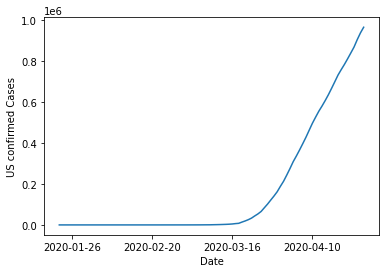

In [10]:
covidPlotter.plot_country_cases(us_confirmed,'US','confirmed')

## Figure 2: US number of new cases per day since 100th confirmed case.

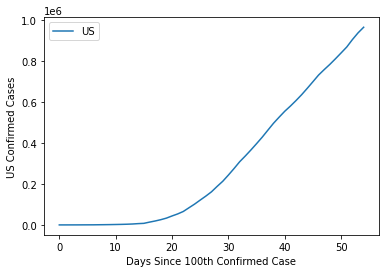

In [11]:
covidPlotter.plot_country_confirmed_cases_index(us_confirmed,'US')

In [0]:
us_days, us_cases_per_day, us_new_cases_per_day = dataImporter.get_cases_confirmed_as_lists(us_confirmed)

## Figure 3: US number of new cases per day since 100th confirmed class.

Number of Total Cases: 965785


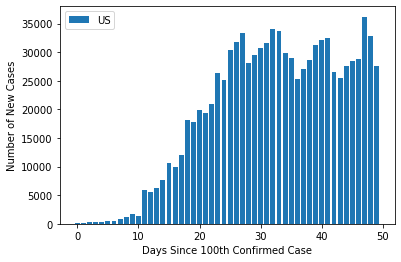

In [13]:
covidPlotter.plot_bar(us_new_cases_per_day,'US','Number of New Cases')
print("Number of Total Cases: {}".format(sum(us_new_cases_per_day)))

## Figures 4-6: Country Comparisons of Most Affected Countries

Here we display confirmed cases both in absolute terms and as ratios in order to facilitate cross country comparisons. Note, the code will, in real-time, select the most affected countries. The threshold for this is those countries that have over 100,000 confirmed cases. That threshold can be changed by adjusting the baseline value.



In [14]:
baseline = 100000
df_subset, yesterday = dataImporter.get_latest_subset(covid_19_time_series_confirmed, baseline)
print("The Last Day reference: {}".format(yesterday))
print("Cases Baseline: {}".format(baseline))

unique_countries = sorted(df_subset['Country/Region'].unique())
print(unique_countries)

df_subset.head()

The Last Day reference: 4/26/20
Cases Baseline: 100000
['France', 'Germany', 'Italy', 'Spain', 'Turkey', 'US', 'United Kingdom']


,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
61,France,91.3624,59.7192,0,0,2,3,3,3,4,5,5,5,6,6,6,6,6,6,6,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,14,18,38,...,9124,10970,12758,14463,16243,20123,22622,25600,29551,33402,38105,40708,45170,52827,57749,59929,65202,69500,71412,75343,79163,83057,87366,91738,94863,121712,125394,130365,133585,146075,148084,148086,153011,155393,158168,155980,158303,159952,161644,162220
65,Germany,51.0000,9.0000,0,0,0,0,0,1,4,4,4,5,8,10,12,12,12,12,13,13,14,14,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,27,46,...,12327,15320,19848,22213,24873,29056,32986,37323,43938,50871,57695,62095,66885,71808,77872,84794,91159,96092,100123,103374,107663,113296,118181,122171,124908,127854,130072,131359,134753,137698,141397,143342,145184,147065,148291,150648,153129,154999,156513,157770
84,Italy,43.0000,12.0000,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,20,62,155,229,322,453,655,...,35713,41035,47021,53578,59138,63927,69176,74386,80589,86498,92472,97689,101739,105792,110574,115242,119827,124632,128948,132547,135586,139422,143626,147577,152271,156363,159516,162488,165155,168941,172434,175925,178972,181228,183957,187327,189973,192994,195351,197675
156,Spain,40.0000,-4.0000,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,6,13,15,...,13910,17963,20410,25374,28768,35136,39885,49515,57786,65719,73235,80110,87956,95923,104118,112065,119199,126168,131646,136675,141942,148220,153222,158273,163027,166831,170099,172541,177644,184948,190839,191726,198674,200210,204178,208389,213024,219764,223759,226629
170,Turkey,38.9637,35.2433,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,98,192,359,670,1236,1529,1872,2433,3629,5698,7402,9217,10827,13531,15679,18135,20921,23934,27069,30217,34109,38226,42282,47029,52167,56956,61049,65111,69392,74193,78546,82329,86306,90980,95591,98674,101790,104912,107773,110130


### Figure 4: Total confirmed cases by date for Most Affected Countries
In absolute numbers, as of the first week of March, the US emerged as having the most rapidly rising confirmed cases.



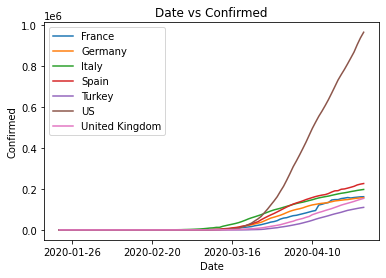

In [15]:
covidPlotter.plot_multi_countries(unique_countries, population, df_subset,yaxis='confirmed')

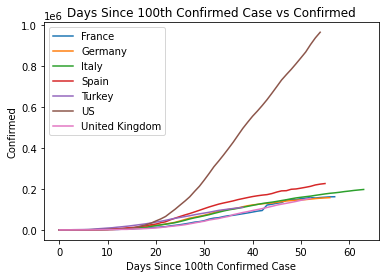

In [16]:
covidPlotter.plot_multi_countries(unique_countries, population, df_subset,yaxis='confirmed',daySince=True)

### Figure 5: Ratio of confirmed cases over population for Most Affected Countries  
However, when looking at the ratio of confirmed cases over total population in each country, Italy and Spain stand out as being the most hard hit.



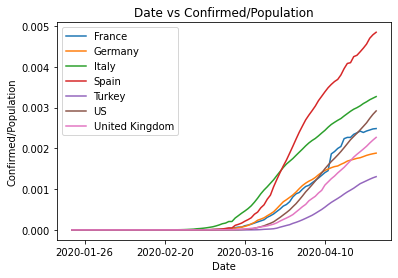

In [17]:
covidPlotter.plot_multi_countries(unique_countries, population, df_subset,yaxis='population')

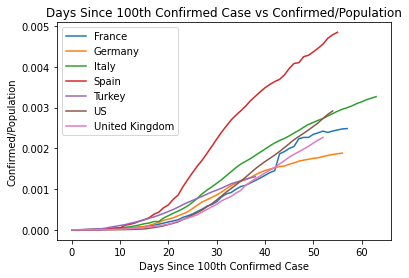

In [18]:
covidPlotter.plot_multi_countries(unique_countries, population, df_subset,yaxis='population',daySince=True)

### Figure 6: Ratio of Confirmed / Population Density by Date for Most Affected Countries  
Despite having a large land mass, it appears that the US overtakes other countries even when controlling for population density. However, this may be a problem with our unit of analysis. Most cases within the US are likely within large urban centers. So, this plot may be misleading.

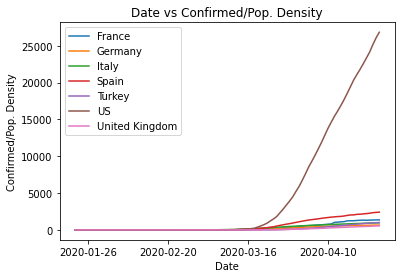

In [19]:
covidPlotter.plot_multi_countries(unique_countries, population, df_subset,yaxis='density')

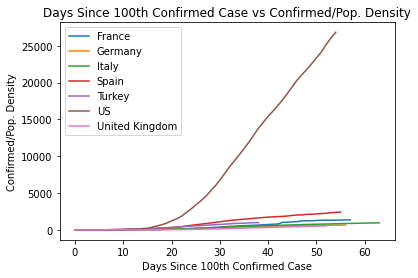

In [20]:
covidPlotter.plot_multi_countries(unique_countries, population, df_subset,yaxis='density',daySince=True)

# Modeling: What does the future look like? 

In order to leverage past patterns of transmission rates and attempt to predict future rates, we used the Prophet library. This library is based on the Autoregressive integrated moving average (ARIMA) method to predict future values on time series data. Given the level of uncertainty in the data, we only forecast 28 days into the future. 

Broadly, the model depicts increasing rates of infection (based on trends to date) and increasing uncertainty as we move further into the future (expanding confidence intervals). Of course, future transmission rates also depends on a countries particular policy. This model predicts the US will reach one million confirmed cases of the virus on April 28, 2020. 


In [0]:
def simple_model(fulldata, country,changepoint_prior_scale=0.15,periods_days=28):
  """
  country: country of interest
  changepoint_prior_scale: This hyperparameter is used to control how sensitive the trend is to changes, 
              with a higher value being more sensitive and a lower value less sensitive. 
              This value is used to combat one of the most fundamental trade-offs in machine learning: bias vs. variance.
  periods_days: number of days you want to predict default 28 days ( ~1 month )
  """
  import fbprophet
  confirmed_df = dataImporter.subset_country(fulldata, country)
  days, cases_per_day, new_cases_per_day = dataImporter.get_cases_confirmed_as_lists(confirmed_df)

  # Prophet requires columns ds (Date) and y (value)
  df = pandas.DataFrame(list(zip(days, cases_per_day)), columns =['Date', 'cases']) 
  gm = df.rename(columns={'Date': 'ds', 'cases': 'y'})

  # Make the prophet model and fit on the data
  gm_prophet = fbprophet.Prophet(changepoint_prior_scale=changepoint_prior_scale)
  gm_prophet.fit(gm)

  # Make a future dataframe
  gm_forecast = gm_prophet.make_future_dataframe(periods=periods_days, freq='D')

  # Make predictions
  gm_forecast = gm_prophet.predict(gm_forecast)
  gm_prophet.plot(gm_forecast, xlabel = 'Date', ylabel = 'Confirmed Cases')

  return gm_forecast

def predict_future_date(forcast, predictNum):
  import pandas
  """
  forcast: prediction model returned by simple_model
  predictNum : Number of Cases you want to predict the day the forcast model reaches those cases
  """
  try:
    date = forcast.loc[forcast.trend > (predictNum -1 )].iloc[0].ds
  except IndexError:
    date = "Cannot Be Predicted from The model"
  return date


INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Prediction Date of 1000000 cases 2020-04-28 00:00:00


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
114,2020-05-15,1.527252e+06,1.472854e+06,1.587684e+06,1.473303e+06,1.587436e+06,684.066706,684.066706,684.066706,684.066706,684.066706,684.066706,0.0,0.0,0.0,1.527936e+06
115,2020-05-16,1.556887e+06,1.498266e+06,1.624038e+06,1.497423e+06,1.621530e+06,1386.151012,1386.151012,1386.151012,1386.151012,1386.151012,1386.151012,0.0,0.0,0.0,1.558273e+06
116,2020-05-17,1.586522e+06,1.522718e+06,1.655452e+06,1.522684e+06,1.656335e+06,572.318337,572.318337,572.318337,572.318337,572.318337,572.318337,0.0,0.0,0.0,1.587094e+06
117,2020-05-18,1.616157e+06,1.546417e+06,1.689466e+06,1.546970e+06,1.690417e+06,-516.882192,-516.882192,-516.882192,-516.882192,-516.882192,-516.882192,0.0,0.0,0.0,1.615640e+06
118,2020-05-19,1.645791e+06,1.572022e+06,1.725463e+06,1.572368e+06,1.725382e+06,-686.749153,-686.749153,-686.749153,-686.749153,-686.749153,-686.749153,0.0,0.0,0.0,1.645105e+06
119,2020-05-20,1.675426e+06,1.596311e+06,1.758946e+06,1.596943e+06,1.760153e+06,-1065.837309,-1065.837309,-1065.837309,-1065.837309,-1065.837309,-1065.837309,0.0,0.0,0.0,1.674361e+06
120,2020-05-21,1.705061e+06,1.622719e+06,1.794923e+06,1.621904e+06,1.794765e+06,-373.067401,-373.067401,-373.067401,-373.067401,-373.067401,-373.067401,0.0,0.0,0.0,1.704688e+06
121,2020-05-22,1.734696e+06,1.647801e+06,1.833155e+06,1.646944e+06,1.832733e+06,684.066706,684.066706,684.066706,684.066706,684.066706,684.066706,0.0,0.0,0.0,1.735380e+06
122,2020-05-23,1.764331e+06,1.672103e+06,1.870656e+06,1.670715e+06,1.870768e+06,1386.151012,1386.151012,1386.151012,1386.151012,1386.151012,1386.151012,0.0,0.0,0.0,1.765717e+06
123,2020-05-24,1.793966e+06,1.695182e+06,1.907430e+06,1.693453e+06,1.906785e+06,572.318337,572.318337,572.318337,572.318337,572.318337,572.318337,0.0,0.0,0.0,1.794539e+06


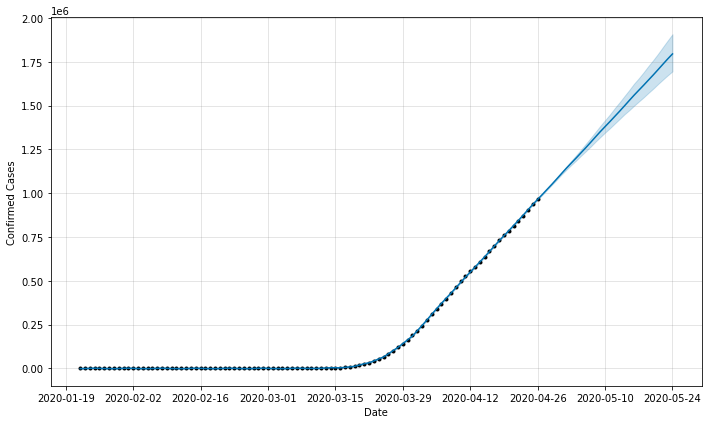

In [22]:
# When creating the prophet models, I set the changepoint prior to 0.15, up from the default value of 0.05. 
# This hyperparameter is used to control how sensitive the trend is to changes, 
# with a higher value being more sensitive and a lower value less sensitive. 
# This value is used to combat one of the most fundamental trade-offs in machine learning: bias vs. variance.

us_forecast = simple_model(covid_19_time_series_confirmed,'US', changepoint_prior_scale=0.05, periods_days=28)
predictNum = 1000000 # One Million for the U.S.
print("Prediction Date of {} cases {}".format(predictNum,predict_future_date(us_forecast,predictNum)))

us_forecast.tail(10)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


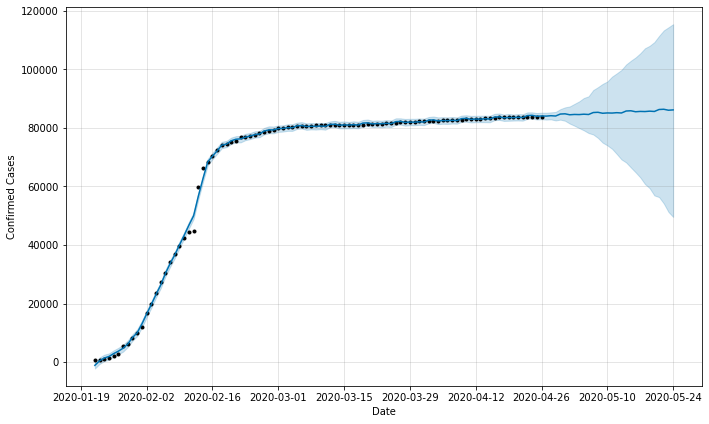

In [23]:
china_forecast = simple_model(covid_19_time_series_confirmed, 'China')

## CONCLUSIONS: 

COVID-19 is a disease that has no regard for geography, and spreadly globally so fast that creating case-number thresholds for cross-country comparison became unnecessary. Many countries that are typically considered "developed" have the highest rates of infection in the world--possibly due to large rates of international travellers.  It was somewhat surprising to see China's infection rate so low, though there is speculation that intentionally reporting may be at play there.

When we consider the physical geography of Europe, with many countries sharing borders, it may not be too surprising that infection rates are high. However, varying government responses around the world have clearly had an impact. In countries that responded early and aggressively to the pandemic, the rates of growth were shorter and the number of infections lower (South Korea for example). Countries that waited longer to close businesses and encourage social distancing, like Britain and the U.S., show a faster rate of growth and higher total infections.

This program is fairly simple compared to others that have been developed since the COVID-19 crisis began. However, it is a useful tool that provides insight into infection rates for all countries, with a focus on those that have the largest number of infections. The data visualizations are easy to read and understand, and they provide the user with both raw and normalized figures in context of population. The program updates with the latest data automatically each time the code is run, so requires no additional user input. Our program is written to automatically display plots only for countries with more than 100,000 infections.

With additional time to work on this project, we would focus on a few things. First would be to bring in other types of data to be able to look at things like infection and death rates relative to GDP, median age, median income, and forms of government. We would be interested to see if there is any relationship between these variables and COVID-19 spread and lethality. Second, we would add more interactivity to give users the ability to retrieve data and create visualizations based on their inputs. Third, we would add more visualizations of the data, such as a map-based view of infection and death rates. Last, further research could introduce predictive modeling to explore which country characteristics explain the variation in infection rates. 

# EXTRA CREDIT 

## Web scraping to obtain your data 

For our project we implemented 2 webcraping techniques. The first was to scrape from https://github.com/. We decided to use BeautifulSoup and the requests module in python. Using these modules can bypass the need to have git installed. Our functions are git compatible that a minor update can be implemented to use git instead of BeautifulSoup + requests.
For the second data set, we scraped https://www.worldometers.info which is a table of population data. Again we used BeautifulSoup + requests to write a function ( webscraper.webscrape_population_2020() )  with html parsing to read the table and populate a pandas dataframe. This function also removes commas from the dataset so that we can do numerical operations.


BEYOND THE ORIGINAL SPECIFICATIONS: highlight clearly what things you did that went beyond the original
specifications. That is, discuss what you implemented that would count towards the extra-credit
portion of this project (see section below.)

## Have some user interaction where the user may choose the kinds of queries to perform on the data. Retrieve/display only the appropriate result.



In [0]:
def masterPlot(country, DataFrame):
    import pandas
    df = DataFrame.groupby(['Country/Region']).sum().reset_index()
    dataframe = df[df["Country/Region"] ==country]
    plt.figure(figsize=(10, 10))

    fig, (ax1, ax2)  = plt.subplots(1, 2, sharey='row')

    #### Fig 1 
    dates = dataframe.columns[4:]
    cases_per_day = dataframe.values[0][4:]
    x_values = [datetime.datetime.strptime(d,"%m/%d/%y").date() for d in dates]
    formatter = mdates.DateFormatter("%Y-%m-%d")
    ax1.xaxis.set_major_formatter(formatter)
    locator = mdates.DayLocator()
    ax1.xaxis.set_major_locator(locator)
    ax1.xaxis.set_major_locator(plt.MaxNLocator(3))
    ax1.plot(x_values, cases_per_day)
    ax1.set_ylabel('Confirmed Cases')
    ax1.set_xlabel('Date')

    #### Fig 2
    res = next((i for i, j in enumerate(cases_per_day) if j), None) 
    cases = [i for i in cases_per_day[res:] if i >= 100]
    if len(cases) == 0:
      cases = cases_per_day[res:]
      ax2.set_xlabel('Days Since 1st Case')
    else:
      ax2.set_xlabel('Days Since 100th Case')
    days_since_outbreak = list(range(0, len(cases)))
    ax2.plot(days_since_outbreak,cases, label="{}".format(country))

    plt.show()

def make_table(country, DataFrame, popdf):
  import plotly.graph_objects as go

  df = DataFrame.groupby(['Country/Region']).sum().reset_index()
  dataframe = df[df["Country/Region"] ==country]
  dates = dataframe.columns[4:]
  cases_per_day = dataframe.values[0][4:]
  fig = go.Figure(data=[go.Table(header=dict(values=['Country: {}'.format(country), "Stats" ]),
                 cells=dict(values=[["Population","Population Density (P/Km^2)","Confirmed Cases as of {}".format(dates[-1]),
                                     "Confirmed / Population","Confirmed / Population Density" ], 
                                    [int(population[population['country']==country]['population']),
                                     int(population[population['country']==country]['density(P/Km2)']),
                                     cases_per_day[-1],
                                     float(cases_per_day[-1]/int(population[population['country']==country]['population'])),
                                     float(cases_per_day[-1]/int(population[population['country']==country]['density(P/Km2)']))

                                     ]
                                    ]
                            ))
                     ])
  fig.show()

In [25]:
import ipywidgets as widgets
from IPython.display import display

covid_19_time_series_confirmed 
dropdown_options = ['ALL'] + sorted(covid_19_time_series_confirmed['Country/Region'].unique())

dropdown_country = widgets.Dropdown(options = dropdown_options)

display(dropdown_country)

def dropdown_country_eventhandler(change):
    if (change.new == 'ALL'):
        display(covid_19_time_series_confirmed)
    else:
        display(covid_19_time_series_confirmed[covid_19_time_series_confirmed['Country/Region'] == change.new])
        masterPlot(change.new, covid_19_time_series_confirmed)
        make_table(change.new,covid_19_time_series_confirmed,population)
dropdown_country.observe(dropdown_country_eventhandler, names='value')


Dropdown(options=('ALL', 'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Arg…

## Use advanced queries or manipulate the data in another way (other data manipulation methods, etc.) and display the results.
  
For advanced queries or manipulate the data, we implemented pandas and python dictionaries to filter our data. For our development, we have 2 dataframes, one for confirmed cases and one for population. For the first dataframe we implemented the functions **subset_country(dataframe, country)** which takes in a larger dataframe and returns a smaller dataset on a country level, **get_cases_confirmed_as_lists(dataframe)** which returns back the columns of a dataframe as various lists and **get_latest_subset(dataframe, baseline)** which returns back a dataframe of countries that have more cases than a baseline value. Additionally,  We set up both dataframes in order to cross reference between covid data and population data. The function **plot_multi_countries(unique_countries, population, dataframe, yaxis = 'Confirmed', daySince = False)** takes a list of counties ( defined as unique_countries) and queries data from two dataframes ,population & dataframe , in order to determine the confirmed to population ratio and the confirmed to population density ratio.

# TESTING

For the testing, due to the data in the a column-wise format and it being time series, it required the need to query the data using groupby. In order to correct queries , we designed several functions from webscraping, importing and plotting. To test these functions, we decide to take a static data set as our reference set to test that we return back the expected queries. Within our tests, we also confirm that our webscraper collects the correct data and ingests into the correct columns. Finally, we place in exception handling into various functions to ensure we have correct operational flow. A few select tests are shown below:


In [26]:
import unittest
import os
import sys
import pandas

import dataImporter
import webscraper
import covidPlotter

class quickTest(unittest.TestCase):
    def setUp(self):
        self.testFrame = pandas.read_csv(os.getcwd()+'/cs-project-covid/tests/datatest.csv')
        self.testPopFrame = webscraper.webscrape_population_2020()

    def test_subset_country_noCountry(self):
        '''Test: subset_country returns correct nothing if country not in list'''
        dataframe = self.testFrame.groupby(['Country/Region']).sum().reset_index()
    
        df = dataImporter.subset_country(dataframe, 'FooBar')
        
        refDict = {'Country/Region': {}, 'Lat': {}, 'Long': {}, '1/22/20': {}, '1/23/20': {}, '1/24/20': {}, 
                   '1/25/20': {}, '1/26/20': {}, '1/27/20': {}, '1/28/20': {}, '1/29/20': {}, '1/30/20': {},
                   '1/31/20': {}, '2/1/20': {}, '2/2/20': {}, '2/3/20': {}, '2/4/20': {}, '2/5/20': {},
                   '2/6/20': {},'2/7/20': {}, '2/8/20': {}, '2/9/20': {}, '2/10/20': {}, '2/11/20': {},
                   '2/12/20': {}, '2/13/20': {}, '2/14/20': {}, '2/15/20': {}, '2/16/20': {}, '2/17/20': {},
                   '2/18/20': {}, '2/19/20': {}, '2/20/20': {}, '2/21/20': {}, '2/22/20': {}, '2/23/20': {},
                   '2/24/20': {}, '2/25/20': {}, '2/26/20': {}, '2/27/20': {}, '2/28/20': {}, '2/29/20': {}, 
                   '3/1/20': {}, '3/2/20': {}, '3/3/20': {}, '3/4/20': {}, '3/5/20': {}, '3/6/20': {}, 
                   '3/7/20': {}, '3/8/20': {}, '3/9/20': {}, '3/10/20': {}, '3/11/20': {}, '3/12/20': {}, 
                   '3/13/20': {}, '3/14/20': {}, '3/15/20': {}, '3/16/20': {}, '3/17/20': {}, '3/18/20': {}, 
                   '3/19/20': {}, '3/20/20': {}, '3/21/20': {}, '3/22/20': {}, '3/23/20': {}, '3/24/20': {}, 
                   '3/25/20': {}, '3/26/20': {}, '3/27/20': {}, '3/28/20': {}, '3/29/20': {}, '3/30/20': {}, 
                   '3/31/20': {}, '4/1/20': {}, '4/2/20': {}, '4/3/20': {}, '4/4/20': {}, '4/5/20': {}, 
                   '4/6/20': {}, '4/7/20': {}, '4/8/20': {}, '4/9/20': {}, '4/10/20': {}, '4/11/20': {},
                   '4/12/20': {}, '4/13/20': {}, '4/14/20': {}, '4/15/20': {}, '4/16/20': {}, '4/17/20': {}, 
                   '4/18/20': {}, '4/19/20': {}, '4/20/20': {}, '4/21/20': {}, '4/22/20': {}}
        self.assertTrue(refDict == df.to_dict())

    def test_get_latest_subset_yesterday(self):
        '''Test: get_latest_subset returns date else key error'''
        # get_latest_subset uses datetime object to get today real time so test cannot be static 
        # We do have a static version in our tests script
        try:
            df_subset, yesterday = dataImporter.get_latest_subset(self.testFrame, 800000)
        except KeyError as e:
            self.assertEqual(type(e), KeyError)

    def test_webscrape_population_2020(self):
        '''Test Population Frame has needed Columns'''
        df = webscraper.webscrape_population_2020()
        
        for colname in ["population","density(P/Km2)"]:
            if colname not in df.columns:
                self.assertTrue(False,"Missing Column: {}".format(colname))
    
    def test_plot_multi_countries_fake_countries(self):
        '''Test Plotting will return false if no avaliable countries'''
        unique_countries = ["Some","Fake","Country"]
        val = covidPlotter.plot_multi_countries(unique_countries, self.testPopFrame, self.testFrame, yaxis = 'FAKE')
        self.assertFalse(val)

unittest.main(argv=[''], verbosity=2, exit=False)



test_get_latest_subset_yesterday (__main__.quickTest)
Test: get_latest_subset returns date else key error ... 

Fetching Data From: https://www.worldometers.info/world-population/population-by-country/


ok
test_plot_multi_countries_fake_countries (__main__.quickTest)
Test Plotting will return false if no avaliable countries ... 

Fetching Data From: https://www.worldometers.info/world-population/population-by-country/


ok
test_subset_country_noCountry (__main__.quickTest)
Test: subset_country returns correct nothing if country not in list ... 

Cannot Process: Some
Cannot Process: Fake
Cannot Process: Country
Fetching Data From: https://www.worldometers.info/world-population/population-by-country/


ok
test_webscrape_population_2020 (__main__.quickTest)
Test Population Frame has needed Columns ... 

Fetching Data From: https://www.worldometers.info/world-population/population-by-country/
Fetching Data From: https://www.worldometers.info/world-population/population-by-country/


ok

----------------------------------------------------------------------
Ran 4 tests in 2.567s

OK
